# Programming for Data Analysis Project

---

### Autumn/Winter 2021
---

<br>

### The Session

The project brief stipulated we *"create a data set by simulating a real-world phenomenon"* It was further suggested we pick something that is of interest to us in our personal or professional life. I've decided to do something on traditional music sessions! I'm going to try and simulate a dataset based on the attendees at sessions in a given month in a particular pub in Cork city!
I'll try to work out all of the variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information.

![session1](images/session1.jpg)

<br>

#### Variables

1. The players  
There can be anywhere between 3 and sometimes more than 10 musicians on any given night and this particular pub (pre-covid!) would usually have 7 sessions a week. So that's a monthly range of between 84 and 280+. The brief asks for "at least one-hundred data points across at least four different variables" - hopefully my simulation doesn't return a dataset close to 84!  
The norm would be around 5 or 6 musicians. 3 is always the minimum, as they would be the paid hosts of the session. Sometimes there might be more than 10 for a party or special occasion. The datatype would have to be integer. This value could also serve as the index?

2. The instruments  
These can be anything from fiddle, accordion, guitar, flute, uilleann pipes, bodhrán, bouzouki, banjo, tin whistle, concertina, double bass, mandolin. Fiddle, accordion, and guitar would be the most common and there would nearly always be at least these three. I guess I create a list and write code to choose a number of them at random but specifying a much higher percentage chance for the 3 mentioned, and various degrees of lower percentages for the others. Other issues I could address are - there would never be more than 1 bodhrán or bouzouki. The datatype would be object (string pardon the pun!!) I can use `np.random.choice` to choose from an array and specify the percentage chance of each coming out.  
```rng.choice(list_1, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5], size=6)```

3. Genre  
While the pub mostly has Irish traditional music (ITM), there are also sessions of bluegrass, old-time, and blues music. I could create an array and use `choice` again? Or code the genres as 1,2,3,4?

4. Ability  
All of the musicians would be of differing ability levels. The hosts would normally be the most able. The guests can range from beginners just joining in, to experienced professional musicians passing through town. The pub in question is quite famous so there would be more of the latter. I guess I create an ability range from 1-10, again maybe normal distribution with a mean around 7? This would suggest a datatype of integer.  
Or this could be categorical objects like 'beginner', 'intermediate', 'advanced'? Or even just intermediate and advanced as there wouldn't be many beginners at these sessions. So this could also be an array of 2/3 items? Or a boolean if just two?

5. Age  
The pub in question is over 21 and is regarded as an 'old man's pub'! Age isn't necessarily connected to ability but can be! I need to decide if this is relevent! The age range would be from 21 up to 80 I'd say. This would be equally spread out I think with possible spikes at either end of the spectrum - old heads and college kids! So data type of integer.  
Could also be age ranges? In which case it would be a list - maybe college kids, grown-ups, old heads! Or age ranges?

6. Repertoire  
A top traditional musician would have a reportoire of hundreds if not thousands of tunes. However a top younger musicians mightn't have learnt that many tunes yet. Equally an intermediate older musician may have amassed a huge amount of tunes but not be great at playing them! So I guess repertoire could be a big range - maybe from 50 up to 2000? And would be directly related to age and possibly ability. Datatype integer? Or maybe range? i.e. 50-100, 100-200, 200-500, 500-1000, >1000? In which case an array?

7. Paid  
The session would always have at least 3 hosts who would be paid. It's most common for these to be the best ability-wise, biggest repertoire, and older (but not always!). The typical instruments would accordion, fiddle and guitar. This datatype would be boolean - True or False. For the genres outside of ITM more musicians may share the fee.

8. Drink  
Just putting this in for the craic! The typical drinks might be Beamish, Guinness, Murphys, various lagers on tap, craft beers, red wine, spirits, water/soft drinks. The older hosts and musicians tend to drink Beamish and red wine! The younger craft beers and non-alcoholic drinks? I guess a list? Need to do a bit of research on the drinking habits of the other music genres maybe?

9. Night of the week  
Another possibility! The midweek nights have less musicians - sometime just the hosts. While the weekends are always busier. The age profile would always be older during the week (retirees!) while the weekend would have a bigger range. There would also be more drinking at the weekend! I'll maybe create a list of the seven days and maybe another option for more than 1?

So what might be the point of all this? So like any dataset we could investiagte whether we could determine someones age from their music genre and drinking habits? Or determine their ability from instrument, repertoire and what night of the week they played!  
This dataset assumes that each of the msucians only appears once which is not the case in reality! There is one particular musician who participates at multiple session in different genres each week!

<br>

#### Coding the variables

We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# plotting
import matplotlib.pyplot as plt

# dataframes
import pandas as pd

import seaborn as sns

from secrets import choice

import random

In [2]:
# set global style for seaborn plots
sns.set_style("darkgrid")

# set global figure size
plt.rcParams["figure.figsize"] = (15,10)

1. **The players**  
We'll decide that the month is December so that's 31 days and 31 sessions. The range for sessions is 3-10, so we could create an array of 31 values between those 2 parameters. We use numpy.random to create a random number generator and then create the array. 
I can change the '31;' parameter to change the month. Maybe give that as an option to the user? I can also change or remove the seed to give a different result each time.

In [3]:
# create a random number generator with seed
rng = np.random.default_rng(42)

# create an array of 31 numbers between 3 and 11 (non-inclusive)
x = rng.integers(3, 11, 31)

Let's have a look

<AxesSubplot:>

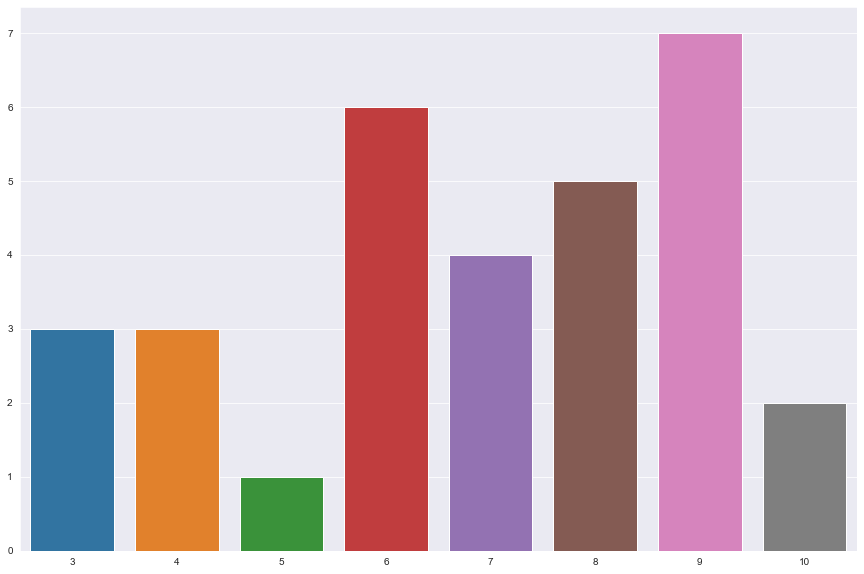

In [4]:
# add up the frequency of each unique value
unique, counts = np.unique(x, return_counts=True)

# plots the results
sns.barplot(x = unique, y = counts)

This doesn't reallty work as I want the average to be around 5/6. There certainly aren't going to be that many sessions with 9 people. I need to find a normal distribution I think with a mean around 5. And with integers! The following code from https://www.py4u.net/discuss/18951 maybe?  
Code from https://stackoverflow.com/questions/55806118/remove-elements-from-numpy-array-smaller-than-1 suggest a way to remove values less than 3 from the array.

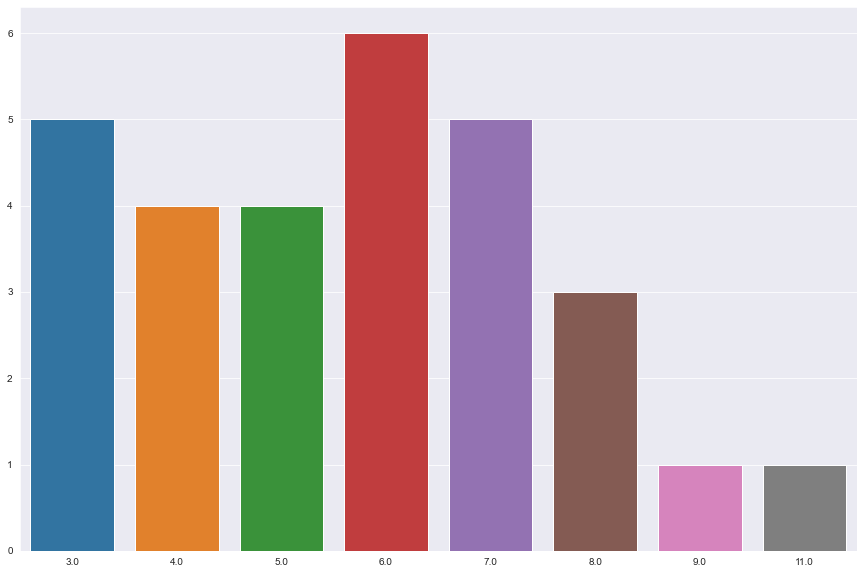

In [5]:
# sets mean, standard deviation and size of array
randomNums = rng.normal(loc=5, scale=3, size=31)

# rounds the values
randomInts = np.round(randomNums)

# removes values lower than 3
randomInts1 = randomInts[(randomInts > 2)]

# add up the frequency of each unique value
unique, counts = np.unique(randomInts1, return_counts=True)

# plots the results
sns.barplot(x = unique, y = counts)

# adds up the results
x = randomInts1.sum()

In [6]:
# adds up the results
x = int(randomInts1.sum())
x

166

We need to turn this total into the first column of the dataframe, and the index?

In [7]:
# create numPy array using x as upper limit
data = np.arange(x)

In [8]:
# turn it into a dataframe
df = pd.DataFrame(data, columns = ['muso'])

# have a look
df.head()

,muso
0,0
1,1
2,2
3,3
4,4


2. **The instruments**  
We need to create a list of the instuments first. I don't think we need to set parameters yet - we'll just give each instrument a percentage chance based on what I think is most likely.

In [9]:
# create a list of instruments
instrs = ['accordion', 'fiddle', 'guitar', 'flute', 'uilleann_pipes', 'concertina', 'bodhrán',
        'mandolin', 'bass', 'banjo', 'drums', 'keyboard']

In [10]:
# we can pass in the probability for each item favoring one over the others
instrs = rng.choice(instrs, p=[0.15, 0.25, 0.3, 0.04, 0.03, 0.01, 0.025, 0.05, 0.05, 0.045, 0.03, 0.02], size=x)

In [11]:
df['instrument'] = instrs.tolist()
df

,muso,instrument
0,0,accordion
1,1,fiddle
2,2,accordion
3,3,bodhrán
4,4,guitar
...,...,...
161,161,guitar
162,162,guitar
163,163,fiddle
164,164,bodhrán


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   muso        166 non-null    int64 
 1   instrument  166 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


I'm going to set muso to be index

In [13]:
df.set_index("muso", inplace = True)

In [14]:
df

,instrument
muso,
0,accordion
1,fiddle
2,accordion
3,bodhrán
4,guitar
...,...
161,guitar
162,guitar
163,fiddle


In [15]:
noGuitars = df[df['instrument']=='guitar']
noGuitars = noGuitars.count().astype(int)
print(noGuitars)
noFiddles = df[df['instrument']=='fiddle']
noFiddles = noFiddles.count().astype(int)

noBanjos = df[df['instrument']=='banjo']
noBanjos = noBanjos.count().astype(int)

noMandolins = df[df['instrument']=='mandolin']
noMandolins = noMandolins.count().astype(int)

noBasses = df[df['instrument']=='bass']
noBasses = noBasses.count().astype(int)
# noBasses

# df['myvar'] = df['myvar']. astype(int)

instrument    54
dtype: int64


I need to save the number of each instrument to be used later.

3. **The genre**  
This is maybe slightly more complicated in that some instruments are only played in only 1 genre while others like guitar would play in all! The first bit of code fills in the ITM genre for those instruments which are exclusive to it.

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

https://stackoverflow.com/questions/65762166/np-where-with-strings-and-multiple-conditions-to-create-a-new-column-in-excel

In [16]:
# # adds a new column with conditions
# df['genre'] = np.where((df['instrument'] == 'accordion') | (df['instrument']== 'concertina') | 
#                        (df['instrument'] == 'uilleann_pipes') | (df['instrument']== 'flute') |
#                        (df['instrument'] == 'bodhrán'), 'ITM', '')

# df.head()

In [17]:
# guitar
genre1 = ['bluegrass', 'ITM', 'old-time', 'blues']

# bass
genre2 = ['bluegrass', 'old-time', 'blues']

# banjo
genre3 = ['bluegrass', 'ITM', 'old-time']

# mandolin
genre4 = ['bluegrass', 'old-time']

# fiddle
genre5 = ['ITM', 'bluegrass', 'old-time']

rng2 = np.random.default_rng()

# guitar = rng2.choice(genre, size=54)

In [18]:
guitar = pd.Series(random.choices(genre1, weights=[1, 1, 1, 2], k=int(noGuitars)))
guitar1 = guitar.to_numpy()

bass = pd.Series(random.choices(genre2, weights=[1, 1, 1], k=int(noBasses)))
bass1 = bass.to_numpy()

banjo = pd.Series(random.choices(genre3, weights=[2, 1, 2], k=int(noBanjos)))
banjo1 = banjo.to_numpy()

mandolin = pd.Series(random.choices(genre4, weights=[1, 1], k=int(noMandolins)))
mandolin1 = mandolin.to_numpy()

fiddle = pd.Series(random.choices(genre5, weights=[2, 1, 1], k=int(noFiddles)))
fiddle1 = fiddle.to_numpy()

# pd.Series(random.choices(['yes','no'], weights=[1, 1], k=len(df), index=df.index)

In [19]:
guitar1

array(['bluegrass', 'old-time', 'bluegrass', 'ITM', 'ITM', 'ITM', 'ITM',
       'ITM', 'blues', 'old-time', 'old-time', 'blues', 'ITM',
       'bluegrass', 'blues', 'ITM', 'bluegrass', 'blues', 'ITM',
       'bluegrass', 'blues', 'old-time', 'blues', 'blues', 'bluegrass',
       'blues', 'bluegrass', 'ITM', 'blues', 'ITM', 'blues', 'ITM', 'ITM',
       'blues', 'ITM', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'old-time', 'old-time', 'ITM', 'bluegrass', 'old-time',
       'blues', 'bluegrass', 'blues', 'blues', 'bluegrass', 'blues',
       'old-time', 'blues'], dtype=object)

In [20]:
# df['genre1'] = np.where((df['instrument'] == 'guitar'), guitar1, '')
# df.head(20)

Need to work out how to do the others now! So the guitar has an equal chance of being in each genre - how do I do that?

In [21]:
# conditions = [
#     (df['instrument'] == 'accordion') | (df['instrument'] == 'concertina') | 
#     (df['instrument'] == 'uilleann_pipes') | (df['instrument']== 'flute') |
#     (df['instrument'] == 'bodhrán'), (df['instrument'] == 'drums') | 
#     (df['instrument'] == 'keyboard'), (df['instrument'] == 'mandolin'), 
#     (df['instrument'] == 'guitar'), (df['instrument'] == 'bass'), (df['instrument'] == 'banjo'), 
#     (df['instrument'] == 'mandolin')
# ]

# # create a list of the values we want to assign for each condition
# values = ['ITM', 'blues', 'old-time' [guitar1], [bass1], [banjo1], [mandolin1]]

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['genre'] = np.select(conditions, values)
# df.head(20)

returns same genre for each guitar - I need it different for each?

https://datatofish.com/if-condition-in-pandas-dataframe/

In [22]:
# for i in df['instrument']:
#     if 'instrument' == 'guitar':
# #         df['genre'] = rng2.choice(genre)
#         np.where(['instrument'] == 'guitar', guitar, '')
# #         df['Birth'] = df1.apply(lambda x: random.randrange(1905,1995, len(df1)),axis=1)
# #         df['genre'] = df.apply(lambda x: rng2.choice(genre), len(df),axis=1)
    
# df.head(20)

In [23]:
# guitar = pd.Series(random.choices(genre, weights=[1, 1, 1, 1], k=8))
# # pd.Series(random.choices(['yes','no'], weights=[1, 1], k=len(df), index=df.index)
# guitar

In [24]:
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'concertina', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'guitar', 'genre'] = guitar1
df.loc[df['instrument'] == 'bass', 'genre'] = bass1  
df.loc[df['instrument'] == 'mandolin', 'genre'] = mandolin1  
df.loc[df['instrument'] == 'banjo', 'genre'] = banjo1
df.loc[df['instrument'] == 'uilleann_pipes', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'flute', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'bodhrán', 'genre'] = 'ITM'
df.loc[df['instrument'] == 'keyboard', 'genre'] = 'blues'
df.loc[df['instrument'] == 'drums', 'genre'] = 'blues'
df.loc[df['instrument'] == 'fiddle', 'genre'] = fiddle1

 
df.head(20)

,instrument,genre
muso,,
0,accordion,ITM
1,fiddle,old-time
2,accordion,ITM
3,bodhrán,ITM
4,guitar,bluegrass
5,flute,ITM
6,bodhrán,ITM
7,guitar,old-time
8,guitar,bluegrass



https://stackoverflow.com/questions/306400/how-can-i-randomly-select-an-item-from-a-list

In [25]:
# rng2.choice(genre)

In [26]:
# for i in df['instrument']:
#     if 'instrument' == 'guitar':
#         df['genre'] = rng2.choice(genre)
# df.head(20)

4. **Ability**  
For the minute I'm going to go with a binary approach - intermediate or advanced. In reality there are no beginners at these sessions. There would be a big range of abilities so I may revisit.  
We'll try a binomial distribution this time. We're going to assume for now that the split between intermediate and advanced is 50/50.

In [27]:
# # creates an array of booleans
# ability = rng.binomial(n=1, p=0.5, size=x)
# ability

We get a big list of booleans! Can I convert this back to strings? In the meantime I'll just add to the dataframe as is.

In [28]:
# conditions = [
#     (df['ability'] == TRUE), (df['ability'] == FALSE)
# ]

# # create a list of the values we want to assign for each condition
# values = ['decent', 'wizz']

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['ability'] = np.select(conditions, values)
# df.head(20)

In [29]:
# for i in ability:
#     if True:
#         ability.append('whizz')
#     else:
#         ability.append('handy_enough')

In [30]:
ability = pd.Series(random.choices(['decent','wizz'], weights=[1, 1], k=len(df)))

In [31]:
df['ability'] = ability.tolist()
df

,instrument,genre,ability
muso,,,
0,accordion,ITM,decent
1,fiddle,old-time,decent
2,accordion,ITM,wizz
3,bodhrán,ITM,decent
4,guitar,bluegrass,wizz
...,...,...,...
161,guitar,old-time,decent
162,guitar,blues,decent
163,fiddle,bluegrass,decent


5. **Age**  
For now we're going to have 3 age-groups - college kids, grown-ups, old heads. The breakdown is going to be skewed towards the outer 2 ranges.

In [32]:
age_group = ['college_kid', 'so_called_grown-up', 'old-head']

In [33]:
age_group = rng.choice(age_group, p=[0.4, 0.2, 0.4], size=x)

In [34]:
df['age_group'] = age_group.tolist()
df

,instrument,genre,ability,age_group
muso,,,,
0,accordion,ITM,decent,old-head
1,fiddle,old-time,decent,college_kid
2,accordion,ITM,wizz,college_kid
3,bodhrán,ITM,decent,old-head
4,guitar,bluegrass,wizz,college_kid
...,...,...,...,...
161,guitar,old-time,decent,old-head
162,guitar,blues,decent,so_called_grown-up
163,fiddle,bluegrass,decent,college_kid


6. **Repertoire**  
We're going to create a list of ranges for this - 50-100, 100-200, 200-500, 500-1000, >1000. Typically the ITM musicians would have a much bigger repertoire, while the blues guys would have a much smaller repertoire. Something similar to the genre code above?

In [35]:
# # create an array
# reportoire = ['50-100', '100-200', '200-500', '500-1000', '>1000']

# # create a random array with size x
# reportoire = rng.choice(reportoire, p=[0.2, 0.2, 0.2, 0.2, 0.2], size=x)

In [36]:
# # add to dataframe
# df['reportoire'] = reportoire.tolist()

# # have a look
# df

7. **Paid**  
Only the 'wizz' musos would typically be paid. Need to work that out? In the meantime I'll leave it that 20% of all musos get paid

In [37]:
paid = rng.binomial(n=1, p=0.2, size=x)

In [38]:
df['paid'] = paid.tolist()
df

,instrument,genre,ability,age_group,paid
muso,,,,,
0,accordion,ITM,decent,old-head,1
1,fiddle,old-time,decent,college_kid,0
2,accordion,ITM,wizz,college_kid,0
3,bodhrán,ITM,decent,old-head,0
4,guitar,bluegrass,wizz,college_kid,1
...,...,...,...,...,...
161,guitar,old-time,decent,old-head,1
162,guitar,blues,decent,so_called_grown-up,1
163,fiddle,bluegrass,decent,college_kid,0


8. **Drink**  
Here we'll create a list of the common drinks and for now divide them up randomly for now. A bit of thought needs to go into this though. Older ITM and bluegrass musicians may favour Beamish. Younger college kids maybe craft beer or non-alcoholic stuff.

In [39]:
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'spirits', 'water/soft drinks']

In [40]:
drinks = rng.choice(drinks, size=x)

In [41]:
df['drinks'] = drinks.tolist()
df

,instrument,genre,ability,age_group,paid,drinks
muso,,,,,,
0,accordion,ITM,decent,old-head,1,guinness
1,fiddle,old-time,decent,college_kid,0,murphys
2,accordion,ITM,wizz,college_kid,0,beamish
3,bodhrán,ITM,decent,old-head,0,spirits
4,guitar,bluegrass,wizz,college_kid,1,spirits
...,...,...,...,...,...,...
161,guitar,old-time,decent,old-head,1,red_wine
162,guitar,blues,decent,so_called_grown-up,1,beamish
163,fiddle,bluegrass,decent,college_kid,0,guinness


9. **Night of the week**  
We create a list of the days plus an option for 'more than one'. I skew it in favour of the weekend nights maybe. I will revisit this as the blues, bluegrass and old-time are each on a particular night! Maybe weekend, midweek, or both would be more appropriate?

In [42]:
night = ['midweek', 'weekend', 'both']
night = rng.choice(night, p=[0.4, 0.5, 0.1], size=len(df))

In [43]:
df['night'] = night.tolist()
df

,instrument,genre,ability,age_group,paid,drinks,night
muso,,,,,,,
0,accordion,ITM,decent,old-head,1,guinness,both
1,fiddle,old-time,decent,college_kid,0,murphys,weekend
2,accordion,ITM,wizz,college_kid,0,beamish,midweek
3,bodhrán,ITM,decent,old-head,0,spirits,midweek
4,guitar,bluegrass,wizz,college_kid,1,spirits,midweek
...,...,...,...,...,...,...,...
161,guitar,old-time,decent,old-head,1,red_wine,weekend
162,guitar,blues,decent,so_called_grown-up,1,beamish,midweek
163,fiddle,bluegrass,decent,college_kid,0,guinness,midweek


10. **Gender**  
Unfortunately the gender is way off the charts in this place! Maybe 20% women max! I can use the same code as for ability above and just skew it towards men.

In [44]:
gender = pd.Series(random.choices(['male','female'], weights=[5, 1], k=len(df)))

In [45]:
df['gender'] = gender.tolist()
df

,instrument,genre,ability,age_group,paid,drinks,night,gender
muso,,,,,,,,
0,accordion,ITM,decent,old-head,1,guinness,both,male
1,fiddle,old-time,decent,college_kid,0,murphys,weekend,female
2,accordion,ITM,wizz,college_kid,0,beamish,midweek,male
3,bodhrán,ITM,decent,old-head,0,spirits,midweek,male
4,guitar,bluegrass,wizz,college_kid,1,spirits,midweek,male
...,...,...,...,...,...,...,...,...
161,guitar,old-time,decent,old-head,1,red_wine,weekend,male
162,guitar,blues,decent,so_called_grown-up,1,beamish,midweek,male
163,fiddle,bluegrass,decent,college_kid,0,guinness,midweek,male


In [46]:
# save to csv
df.to_csv('the_session.csv')

<br>

---
So far this is all completely random - just in case anyone is looking this far back!! 🤣

Now I have a try and come up with some code to create and simulate the relationships between values.

<br>
---

## References

https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

https://www.statology.org/add-numpy-array-to-pandas-dataframe/

<br>

---
# END